In [585]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Regresion logistica: One vs. All

Base de datos de 5000 numeros, de 20x20 pixeles: el trabajo nos presenta la necesidad de armar un modelo de regresion logistica para poder predecir los disintos numeros del 1 al 10 de la base de datos: para lograrlo se implementaria una funcion de costo, el gradiente de la misma y se usaran algoritmos de la libreria scypi para minimizar los parametros


In [586]:
data = loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

In [587]:
#5000 filas que representan numeros del 0-9, y 400 columnas que representan la intensidad luminica de cada pixel
X.shape

(5000, 400)

In [588]:
y.shape

(5000, 1)

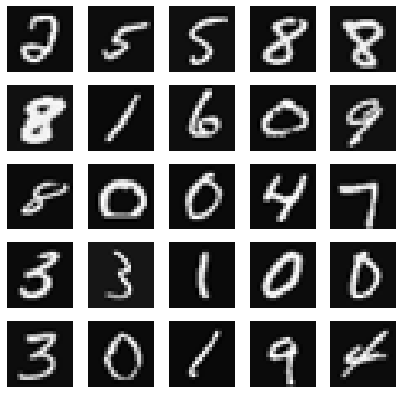

In [589]:
#Graficamos algunos numeros aleatorios del dataset
_, axarr = plt.subplots(5,5,figsize=(7,7))
plt.gray()
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20), order = "F"))
        axarr[i,j].axis('off') 

In [590]:
def sigmoid(h):
    """
    G = sigmoid function, devuelve probabilidad dado h arbitrario.
    """
    g = 1/(1+np.exp(-h))
    return g

In [591]:
def costFunctionReg(theta, X, y, lmbda):
    """
    J = cost function (loss function), devuelve el error.
    """
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [592]:
def gradRegularization(theta, X, y, alpha):
    """
    Gradiente de la funcion de costo. Se utiliza en el algoritmo para encontrar los parametros que
    minimizan J.
    """
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * alpha / m
    temp[0] = temp[0] - theta[0] * alpha / m
    return temp

In [593]:
#Agregar columnas de 1's y asignamos (m,n) las dimensiones de la matriz X.
X = np.insert(X,0,1, axis = 1)
(m, n) = X.shape

In [594]:
#Algoritmo que minimiza J.
learning_rate = 0.1
k = 10
theta = np.zeros((k,n)) 
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, 
                           args = (X, (y == digit_class).flatten(), learning_rate), maxiter = 500)

Optimization terminated successfully.
         Current function value: 0.008587
         Iterations: 95
         Function evaluations: 363
         Gradient evaluations: 363
Optimization terminated successfully.
         Current function value: 0.013127
         Iterations: 100
         Function evaluations: 386
         Gradient evaluations: 386
Optimization terminated successfully.
         Current function value: 0.050812
         Iterations: 227
         Function evaluations: 692
         Gradient evaluations: 692
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 212
         Function evaluations: 640
         Gradient evaluations: 640
Optimization terminated successfully.
         Current function value: 0.033079
         Iterations: 157
         Function evaluations: 514
         Gradient evaluations: 514
Optimization terminated successfully.
         Current function value: 0.054470
         Iterations: 236
         Function eva

In [595]:
#Precision del modelo. Comapara las predicciones con sus valores reales en y.
#Debido a la naturaleza de la base de datos, hay que corregir algunas entradas de y.
n_correct, n_total = 0., 0.
Y = y.copy()
for irow in range(X.shape[0]):
    n_total += 1
    if (Y[irow] == 10):
        Y[irow] = 0
    if np.argmax(sigmoid(np.dot(X[irow], theta.T))) == int(Y[irow]): 
        n_correct += 1
print ("Precision: %0.2f%%"%(100*(n_correct/n_total)))

Precision: 96.46%


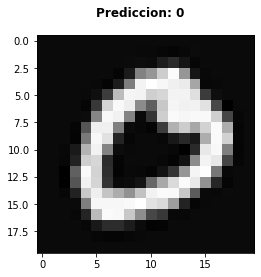

In [596]:
#Se elige aleatoriamente una fila de X, y se predice que numero es aplicando el modelo.
def predictRandomDigit():
    random_digit = X[np.random.randint(X.shape[0])]
    plt.imshow(random_digit[1:].reshape((20, 20), order='F'))
    predicted = np.argmax(sigmoid(np.dot(random_digit, theta.T)))
    plt.suptitle('Prediccion: %d'%predicted, fontsize=12, fontweight='bold')

predictRandomDigit()

# Red Neuronal

Con la misma base de datos de la parte 1 de esta presentacion, se cargan desde un archivo los parametros (theta) para una red neuronal del mismo proposito que la parte 1: reconocer numeros escritos a mano. 

In [597]:
#ex3weights.mat ya nos da los parametros entrenados de la red neuronal theta1 y theta2
data = loadmat("ex3weights.mat")
theta1, theta2 = data['Theta1'], data['Theta2']
print ("theta1 shape:",theta1.shape)
print ("theta2 shape:",theta2.shape)

theta1 shape: (25, 401)
theta2 shape: (10, 26)


In [598]:
def propagateForward(row,thetas):
    """
    Funcion dado theta, y un input de X (fila) arbitrarios, aplica el algoritmo para encontrar el output de
    la ultima layer de la NN.
    """
    features = row
    for i in range(len(thetas)):
        theta = thetas[i]
        z = np.dot(theta,features)
        output = sigmoid(z)
        if i == len(thetas)-1:
            return output
        output = np.insert(output,0,1) #Agregando el intercept term
        features = output

In [599]:
def predictNN(row,thetas):
    """
    Funcion que ejecuta "propagateForward", y dado el output decide que digito es el ingresado 
    por la fila de X.
    """
    classes = [1,2,3,4,5,6,7,8,9,10]
    output = propagateForward(row,thetas)
    return classes[np.argmax(np.array(output))]

In [600]:
#Cargo theta1 y theta2 que corresponden a los parametros del input, y hidden layer de la NN.
myThetas = [theta1, theta2]

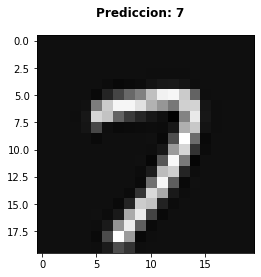

In [601]:
#Elijo una fila de X aletoriamente, y veo el calculo de la NN. Cuando el algoritmo predice un 10, por pantalla
#muestro un 0.
def predictRandomDigit():
    random_digit = X[np.random.randint(X.shape[0])]
    plt.imshow(random_digit[1:].reshape((20, 20), order='F'))
    if (predictNN(random_digit,myThetas) == 10):
        predicted = 0
    else:
        predicted = predictNN(random_digit,myThetas)
    plt.suptitle('Prediccion: %d'%predicted, fontsize=12, fontweight='bold')

predictRandomDigit()

In [602]:
#Veamos la precision del modelo comparando el resultado del output con los valores verdaderos en y.
#Guardo los indices incorrectos para mas adelante.
n_correct, n_total = 0., 0.
incorrect_indices = []
for irow in range(X.shape[0]):
    n_total += 1
    if predictNN(X[irow],myThetas) == int(y[irow]): 
        n_correct += 1
    else: incorrect_indices.append(irow)
print ("Precision: %0.2f%%"%(100*(n_correct/n_total)))

Precision: 97.52%


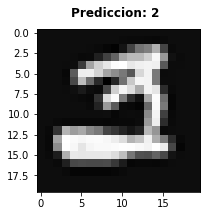

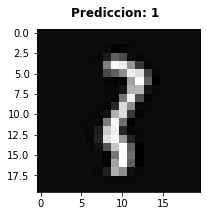

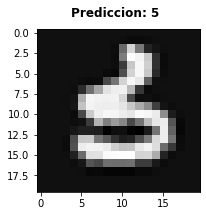

In [603]:
#Seria interesante ver algunos numeros que el modelo no pudo predecir correctamente
for i in range(3):
    x = random.choice(incorrect_indices)
    plt.figure(figsize=(3,3))
    plt.imshow(X[x][1:].reshape((20, 20), order='F'))
    plt.suptitle('Prediccion: %d'%(0 if (predictNN(X[x],myThetas) == 10) else (predictNN(X[x],myThetas))),
                 fontsize=12, fontweight='bold')
    plt.show()